# Getting started with Gaia TAP+ Service

In this tutorial, we go through how to access, examine and use Gaia TAP+ service using **gapipes**.
For databases as large as Gaia (and many other large astronomical surveys for that matter),
downloading them as a set of files is no longer practical.

The Table Access Protocol (TAP) was designed for the purpse of communicating general tabular data by the [IVOA](http://www.ivoa.net/).
For [Gaia](http://gea.esac.esa.int/archive/) and other ESA Services, the ESDC extended this protocol, called TAP+.
The extension includes user table space, sharing tables among groups, and listing jobs.

In **gapipes**, there are two core classes that interfaces these services:
one for plain TAP (`gapipes.TAP`) and one for GaiaTAP+ (`gapipes.GaiaTapPlus`).
While they are written so that you can point at any available service,
a default instance `gapipes.gaia` is already defined pointing at [the official Gaia Archive](#).

In [1]:
import gapipes as gp

gp.gaia

GaiaTapPlus("gea.esac.esa.int", "/tap-server/tap", "https", 443)

## Inspecting table meta data

The first thing you want to do before diving in is of course learn a little bit what the database contains: what tables and table columns are available. Note that there is an extensive [documentation](http://gea.esac.esa.int/archive/documentation/index.html) available online as well.

In [2]:
gp.gaia.tables

[public.dual, 1 columns,
 public.hipparcos, 78 columns,
 public.hipparcos_newreduction, 43 columns,
 public.hubble_sc, 421 columns,
 public.igsl_source, 43 columns,
 public.igsl_source_catalog_ids, 12 columns,
 public.tycho2, 39 columns,
 gaiadr1.aux_qso_icrf2_match, 12 columns,
 gaiadr1.ext_phot_zero_point, 7 columns,
 gaiadr1.allwise_best_neighbour, 8 columns,
 gaiadr1.allwise_neighbourhood, 6 columns,
 gaiadr1.gsc23_best_neighbour, 8 columns,
 gaiadr1.gsc23_neighbourhood, 6 columns,
 gaiadr1.ppmxl_best_neighbour, 8 columns,
 gaiadr1.ppmxl_neighbourhood, 6 columns,
 gaiadr1.sdss_dr9_best_neighbour, 8 columns,
 gaiadr1.sdss_dr9_neighbourhood, 6 columns,
 gaiadr1.tmass_best_neighbour, 8 columns,
 gaiadr1.tmass_neighbourhood, 6 columns,
 gaiadr1.ucac4_best_neighbour, 8 columns,
 gaiadr1.ucac4_neighbourhood, 6 columns,
 gaiadr1.urat1_best_neighbour, 8 columns,
 gaiadr1.urat1_neighbourhood, 6 columns,
 gaiadr1.cepheid, 18 columns,
 gaiadr1.phot_variable_time_series_gfov, 7 columns,
 gaiad

You can filter table list by schema or table name.

In [3]:
gp.gaia.tables.filter(schema='public')

[public.dual, 1 columns,
 public.hipparcos, 78 columns,
 public.hipparcos_newreduction, 43 columns,
 public.hubble_sc, 421 columns,
 public.igsl_source, 43 columns,
 public.igsl_source_catalog_ids, 12 columns,
 public.tycho2, 39 columns]

In [4]:
gp.gaia.tables.filter(table='gaia_source')

[gaiadr1.gaia_source, 57 columns, gaiadr2.gaia_source, 96 columns]

Have a look at one particular table in detail.

In [5]:
t = gp.gaia.tables.filter(table='gaia_source')[0]
print(t.description)

This table has an entry for every Gaia observed source as listed in the
Main Database accumulating catalogue version from which the catalogue
release has been generated. It contains the basic source parameters,
that is only final data (no epoch data) and no spectra (neither final
nor epoch).


In [6]:
print('total number of columns =', len(t.columns))
t.columns[:5]

total number of columns = 57


[Column(name="solution_id", unit="", description="All Gaia data processed by the D"...,
 Column(name="source_id", unit="", description="A unique single numerical identifi"...,
 Column(name="random_index", unit="", description="Random index which can be used "...,
 Column(name="ref_epoch", unit="yr", description="Reference epoch to which the ast"...,
 Column(name="ra", unit="deg", description="Barycentric right ascension \alpha of "...]

A column description can be quite long. Do `print` to get the long description or access `.description`.

In [7]:
print(t.columns[1])

Column name: source_id
unit: 
desription: A unique single numerical identifier of the source.

For the contents of Gaia DR1, which does not include Solar System
objects, the source ID consists consists of a 64-bit integer, least
significant bit = 1 and most significant bit = 64, comprising:

-   a HEALPix index number (sky pixel) in bits 36 - 63; by definition
    the smallest HEALPix index number is zero.

-   a 2-bit Data Processing Centre code in bits 34 - 35; for example
    MOD(sourceId / 4294967296, 8) can be used to distinguish between
    sources initialised via the Initial Gaia Source List by the Torino
    DPC (code = 0) and sources otherwise detected and assigned by Gaia
    observations (code >0)

-   a 25-bit plus 7 bit sequence number within the HEALPix pixel in bits
    1 - 32 split into:

    -   a 25 bit running number in bits 8 – 32; the running numbers are
        defined to be positive, i.e. never zero (except in the case of
        forced empty windows)

    -   a 

### Getting information about specific table(s)

You can also get information about specific tables with GaiaTAP+.

In [8]:
gp.gaia.get_table_info('gaiadr2.gaia_source')

[gaiadr2.gaia_source, 96 columns]

## Query

There are two kinds of queries supported: synchronous and asynchonous.

Let's start with synchonous queries.

### Synchronous queries

Use `.query` to send an ADQL query to the database. The default behaviour is to request output in csv format and read resulting table as pandas.DataFrame.

In [9]:
r = gp.gaia.query('select top 100 * from gaiadr1.gaia_source', output_format='csv')
print(type(r))
r.head()

<class 'pandas.core.frame.DataFrame'>


,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,scan_direction_mean_k4,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_variable_flag,l,b,ecl_lon,ecl_lat
0,1635378410781933568,4256392996422268672,887949822,2015.0,278.834034,1.110744,-5.146204,1.134282,NaN,NaN,...,43.585240,88,502.879304,4.105872,18.771111,NOT_AVAILABLE,26.516527,1.221884,279.255322,18.009702
1,1635378410781933568,4255847398169079168,857771074,2015.0,283.965713,3.945827,-2.911484,3.332565,NaN,NaN,...,43.001995,41,192.767590,2.311690,19.812185,NOT_AVAILABLE,30.843430,-2.310847,284.844260,19.811013
2,1635378410781933568,4255780804671530624,1095456361,2015.0,283.967045,0.751117,-3.332992,0.812316,NaN,NaN,...,43.951393,60,1354.252825,4.689919,17.695521,NOT_AVAILABLE,30.468306,-2.503721,284.800066,19.391564
3,1635378410781933568,4256030806134086912,142585630,2015.0,278.127968,3.922400,-6.255799,3.995020,NaN,NaN,...,42.276030,43,205.891747,2.645436,19.740673,NOT_AVAILABLE,25.207716,1.334400,278.448581,16.945423
4,1635378410781933568,4256181301776158464,838669987,2015.0,279.120565,0.875364,-5.487836,0.916942,NaN,NaN,...,42.512657,79,630.588364,7.517914,18.525405,NOT_AVAILABLE,26.344246,0.811475,279.530979,17.650195


Wrong queries will raise exception with a useful message from the server.

In [10]:
r = gp.gaia.query('select top 5 * from foo.bar')

HTTPError: Cannot parse query 'select top 5 * from foo.bar' for job '1544693257391O': 1 unresolved identifiers: bar [l.1 c.21 - l.1 c.28] !

### Asynchronous queries

For a more complicated queries that takes longer, use `.query_async`. The interface is the same except the return value is now a `Job` instance.

In [37]:
query = """
select 
    count(*) as n, 
    round(phot_g_mean_mag, 1) as val
from 
    gaiadr1.tgas_source 
group by val
order by val
"""
j = gp.gaia.query_async(query, output_format='csv', name='histogram')
j

Job(jobid='1544689926783O', phase='EXECUTING')

Use `.get_result` to wait until the job is finished and download the result.

In [38]:
%%time
r = j.get_result()

CPU times: user 26.5 ms, sys: 9.81 ms, total: 36.4 ms
Wall time: 278 ms


In [41]:
%matplotlib inline

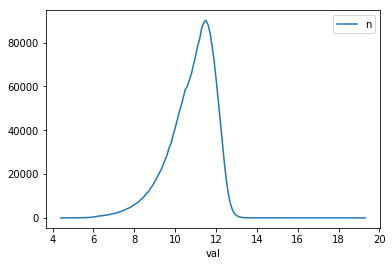

In [42]:
r.plot('val', 'n');

Inspect `Job` if needed.

In [44]:
print(j.query)


select 
    count(*) as n, 
    round(phot_g_mean_mag, 1) as val
from 
    gaiadr1.tgas_source 
group by val
order by val



In [45]:
print(j.url)
print(j.result_url)

https://gea.esac.esa.int/tap-server/tap/async/1544689926783O
https://gea.esac.esa.int/tap-server/tap/async/1544689926783O/results/result


## Using authenticated service

The real benefits of TAP+ is in the authenticated service.

### Logging in and out of server

You should make an account first.

In [11]:
gp.gaia.login() 

User:  soh
Password:  ············


In [47]:
gp.gaia.logout()

### Managing user tables

Once you login, you can upload your own tables to user space.

In [12]:
import pandas as pd
from astropy.table import Table

mytable = Table.from_pandas(pd.DataFrame(dict(a=[1,2,3], b=[4,5,6])))
gp.gaia.upload_table(mytable, 'foobar', table_description='test table to demonstrate upload')

<Response [200]>

When you are logged in, say as user `joe`, querying table list will incluse tables under user schema `user_joe`.

```python
>>> tablelist = gp.gaia.get_table_info()  # with no keywords, gets all tables
>>> tablelist.filter(schema='user_joe')
```

You can delete an uploaded user table.

```python
>>> gp.gaia.delete_user_table('user_joe.foobar')
```